In [26]:
# Plot the Multi-endpoint acute toxicity performance

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import csv
import scipy
from scipy.interpolate import interp1d
import seaborn as sns

In [27]:
df = pd.read_csv('./table_results/MTL_results_on_all_endpoints.csv')

In [28]:
df.columns

Index(['Task', 'MT-DNN-RMSE', 'MT-DNN-R2', 'ST-DNN-RMSE', 'ST-DNN-R2',
       'ST-RF-RMSE', 'ST-RF-R2', 'GCNN-RMSE', 'GCNN-R2', 'DLCA-RMSE',
       'DLCA-R2', 'MT-NYAN-RMSE (single latent)', 'MT-NYAN-R2 (single latent)',
       'MT-NYAN-RMSE (5 random latents)', 'MT-NYAN-R2 (5 random latents)'],
      dtype='object')

In [29]:
endpoints = df['Task'].values[:59]

MT_DNN_RMSE = df['MT-DNN-RMSE'].values[:59]
MT_DNN_RMSE_avg = MT_DNN_RMSE.mean()
MT_DNN_R2 = df['MT-DNN-R2'].values[:59]
MT_DNN_R2_avg = MT_DNN_R2.mean()

ST_DNN_RMSE = df['ST-DNN-RMSE'].values[:59]
ST_DNN_RMSE_avg = ST_DNN_RMSE.mean()
ST_DNN_R2 = df['ST-DNN-R2'].values[:59]
ST_DNN_R2_avg = ST_DNN_R2.mean()

ST_RF_RMSE = df['ST-RF-RMSE'].values[:59]
ST_RF_RMSE_avg = ST_RF_RMSE.mean()
ST_RF_R2 = df['ST-RF-R2'].values[:59]
ST_RF_R2_avg = ST_RF_R2.mean()

GCNN_RMSE = df['GCNN-RMSE'].values[:59]
GCNN_RMSE_avg = GCNN_RMSE.mean()
GCNN_R2 = df['GCNN-R2'].values[:59]
GCNN_R2_avg = GCNN_R2.mean()

DLCA_RMSE = df['DLCA-RMSE'].values[:59]
DLCA_RMSE_avg = DLCA_RMSE.mean()
DLCA_R2 = df['DLCA-R2'].values[:59]
DLCA_R2_avg = DLCA_R2.mean()

MT_NYAN_RMSE_single = df['MT-NYAN-RMSE (single latent)'].values[:59]
MT_NYAN_RMSE_single_avg = MT_NYAN_RMSE_single.mean()
MT_NYAN_R2_single = df['MT-NYAN-R2 (single latent)'].values[:59]
MT_NYAN_R2_single_avg = MT_NYAN_R2_single.mean()

MT_NYAN_RMSE_5_latents = df['MT-NYAN-RMSE (5 random latents)'].values[:59]
MT_NYAN_RMSE_5_latents_avg = MT_NYAN_RMSE_5_latents.mean()
MT_NYAN_R2_5_latents = df['MT-NYAN-R2 (5 random latents)'].values[:59]
MT_NYAN_R2_5_latents_avg = MT_NYAN_R2_5_latents.mean()

In [30]:
pal = sns.color_palette(palette='Set3')
colorlist = [pal[4],pal[2],pal[0],'#B09C85B2',pal[8],pal[5],pal[3]]

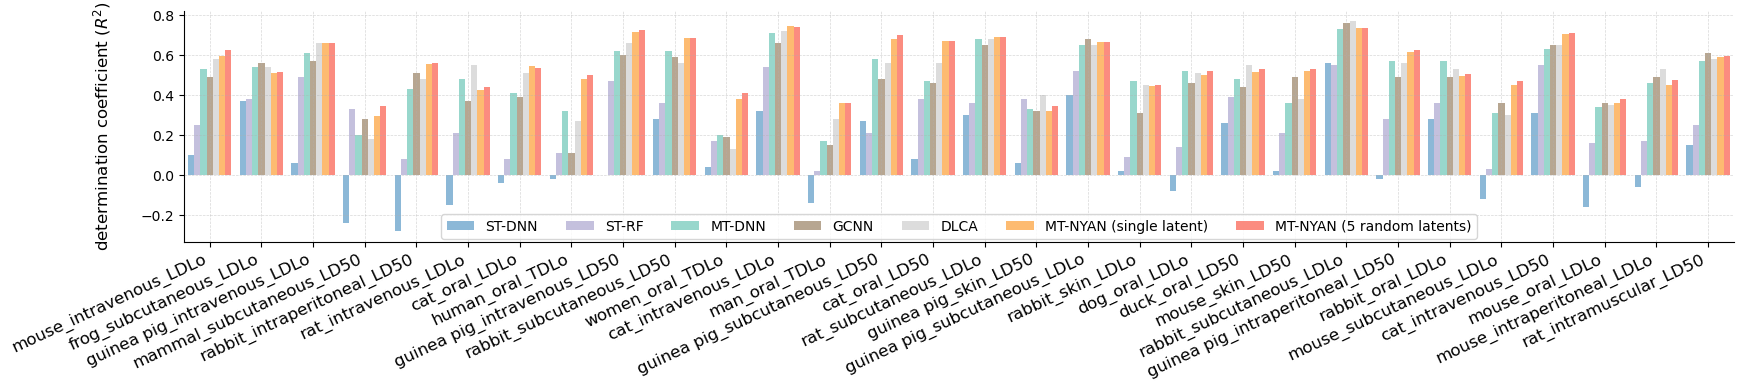

In [31]:
# R2 graph part1
endpoints_group1 = endpoints[0:30]
x_group1 = np.array(range(0,30))
width = 0.12

fig, axes = plt.subplots(figsize=(20,3))
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_ylabel('determination coefficient ($R^2$)',fontsize=12,labelpad=20)
axes.set_xlim(-0.5,29.5)
axes.set_xticks(range(0,30,1))
axes.set_xticklabels(endpoints_group1,rotation=25, ha='right',va='top',fontsize=12)

plt.bar(x_group1-3*width, ST_DNN_R2[:30], width=width, color=colorlist[0], align='center', label="ST-DNN",\
        alpha=0.9)
plt.bar(x_group1-2*width, ST_RF_R2[:30], width=width, color=colorlist[1], align='center', label="ST-RF",\
        alpha=0.9)
plt.bar(x_group1-1*width, MT_DNN_R2[:30], width=width, color=colorlist[2], align='center', label="MT-DNN",\
        alpha=0.9)
plt.bar(x_group1+0*width, GCNN_R2[:30], width=width, color=colorlist[3], align='center', label="GCNN",\
        alpha=0.9)
plt.bar(x_group1+1*width, DLCA_R2[:30], width=width, color=colorlist[4], align='center', label="DLCA",\
        alpha=0.9)
plt.bar(x_group1+2*width, MT_NYAN_R2_single[:30], width=width, color=colorlist[5], align='center', 
        label="MT-NYAN (single latent)", alpha=0.9)
plt.bar(x_group1+3*width, MT_NYAN_R2_5_latents[:30], width=width, color=colorlist[6], align='center', 
        label="MT-NYAN (5 random latents)", alpha=0.9)

plt.grid(axis='both', linestyle='--',linewidth=0.5, alpha=0.5)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 0.15), ncol=7)


fig.savefig('figures/MTL_59endpoint(R2)_bar1.pdf', bbox_inches='tight', pad_inches=0.1)

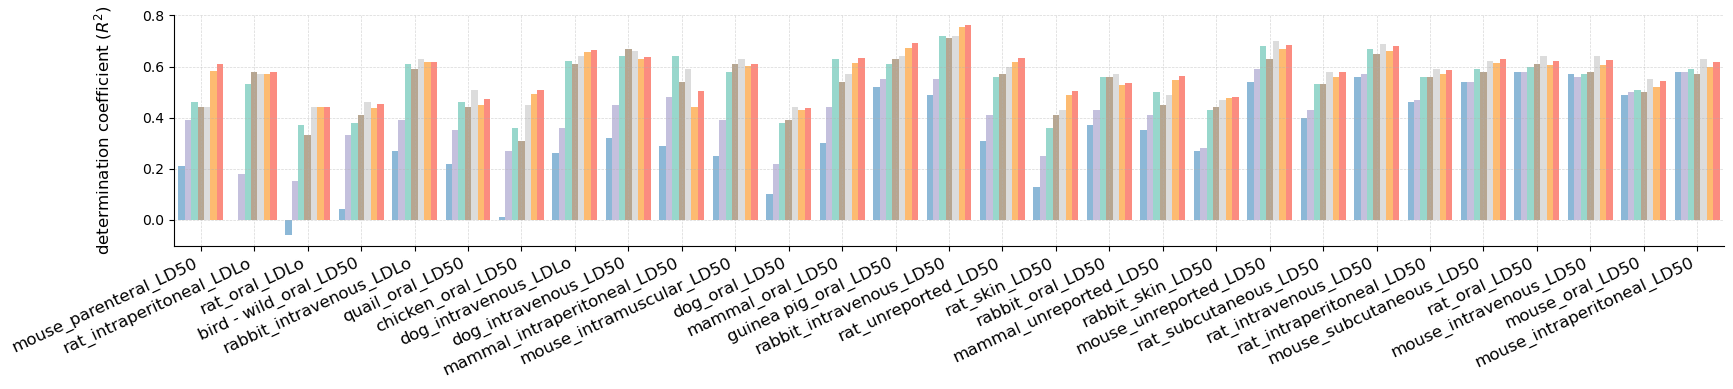

In [32]:
# R2 graph part2
endpoints_group2 = endpoints[30:]
x_group2 = np.array(range(0,29))
width = 0.12

fig, axes = plt.subplots(figsize=(20,3))
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_ylabel('determination coefficient ($R^2$)',fontsize=12,labelpad=20)
axes.set_xlim(-0.5,28.5)
axes.set_xticks(range(0,29,1))
axes.set_xticklabels(endpoints_group2,rotation=25, ha='right',va='top',fontsize=12)

plt.bar(x_group2-3*width, ST_DNN_R2[30:], width=width, color=colorlist[0], align='center', label="ST-DNN",\
        alpha=0.9)
plt.bar(x_group2-2*width, ST_RF_R2[30:], width=width, color=colorlist[1], align='center', label="ST-RF",\
        alpha=0.9)
plt.bar(x_group2-1*width, MT_DNN_R2[30:], width=width, color=colorlist[2], align='center', label="MT-DNN",\
        alpha=0.9)
plt.bar(x_group2+0*width, GCNN_R2[30:], width=width, color=colorlist[3], align='center', label="GCNN",\
        alpha=0.9)
plt.bar(x_group2+1*width, DLCA_R2[30:], width=width, color=colorlist[4], align='center', label="DLCA",\
        alpha=0.9)
plt.bar(x_group2+2*width, MT_NYAN_R2_single[30:], width=width, color=colorlist[5], align='center', 
        label="MT-NYAN (single latent)", alpha=0.9)
plt.bar(x_group2+3*width, MT_NYAN_R2_5_latents[30:], width=width, color=colorlist[6], align='center', 
        label="MT-NYAN (5 random latents)", alpha=0.9)

plt.grid(axis='both', linestyle='--',linewidth=0.5, alpha=0.5)
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.12), ncol=7)


fig.savefig('figures/MTL_59endpoint(R2)_bar2.pdf', bbox_inches='tight', pad_inches=0.1)

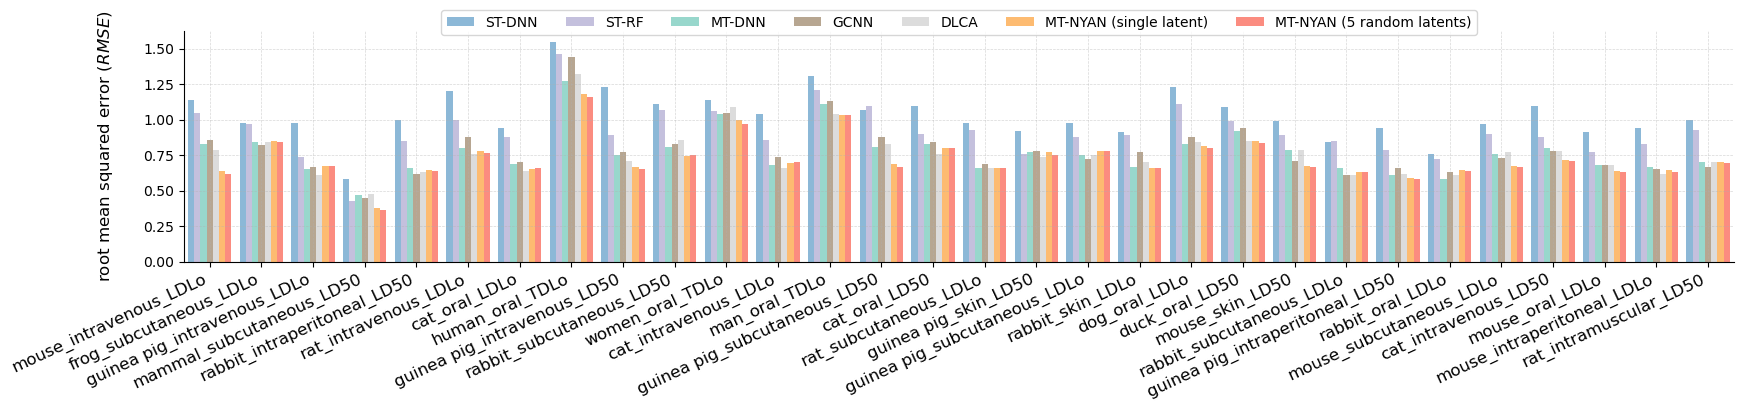

In [33]:
# RMSE graph part1
endpoints_group1 = endpoints[0:30]
x_group1 = np.array(range(0,30))
width = 0.12

fig, axes = plt.subplots(figsize=(20,3))
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_ylabel('root mean squared error ($RMSE$)',fontsize=12,labelpad=20)
axes.set_xlim(-0.5,29.5)
axes.set_xticks(range(0,30,1))
axes.set_xticklabels(endpoints_group1,rotation=25, ha='right',va='top',fontsize=12)

plt.bar(x_group1-3*width, ST_DNN_RMSE[:30], width=width, color=colorlist[0], align='center', label="ST-DNN",\
        alpha=0.9)
plt.bar(x_group1-2*width, ST_RF_RMSE[:30], width=width, color=colorlist[1], align='center', label="ST-RF",\
        alpha=0.9)
plt.bar(x_group1-1*width, MT_DNN_RMSE[:30], width=width, color=colorlist[2], align='center', label="MT-DNN",\
        alpha=0.9)
plt.bar(x_group1+0*width, GCNN_RMSE[:30], width=width, color=colorlist[3], align='center', label="GCNN",\
        alpha=0.9)
plt.bar(x_group1+1*width, DLCA_RMSE[:30], width=width, color=colorlist[4], align='center', label="DLCA",\
        alpha=0.9)
plt.bar(x_group1+2*width, MT_NYAN_RMSE_single[:30], width=width, color=colorlist[5], align='center', 
        label="MT-NYAN (single latent)", alpha=0.9)
plt.bar(x_group1+3*width, MT_NYAN_RMSE_5_latents[:30], width=width, color=colorlist[6], align='center', 
        label="MT-NYAN (5 random latents)", alpha=0.9)

plt.grid(axis='both', linestyle='--',linewidth=0.5, alpha=0.5)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.12), ncol=7)


fig.savefig('figures/MTL_59endpoint(RMSE)_bar1.pdf', bbox_inches='tight', pad_inches=0.1)

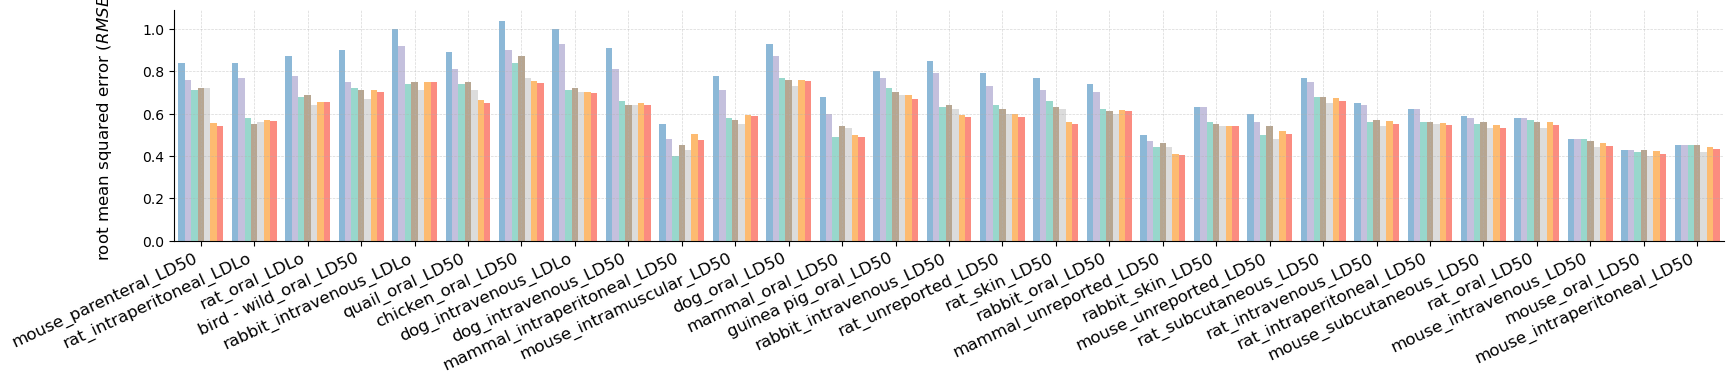

In [10]:
# RMSE graph part2
endpoints_group2 = endpoints[30:]
x_group2 = np.array(range(0,29))
width = 0.12

fig, axes = plt.subplots(figsize=(20,3))
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_ylabel('root mean squared error ($RMSE$)',fontsize=12,labelpad=20)
axes.set_xlim(-0.5,28.5)
axes.set_xticks(range(0,29,1))
axes.set_xticklabels(endpoints_group2,rotation=25, ha='right',va='top',fontsize=12)

plt.bar(x_group2-3*width, ST_DNN_RMSE[30:], width=width, color=colorlist[0], align='center', label="ST-DNN",\
        alpha=0.9)
plt.bar(x_group2-2*width, ST_RF_RMSE[30:], width=width, color=colorlist[1], align='center', label="ST-RF",\
        alpha=0.9)
plt.bar(x_group2-1*width, MT_DNN_RMSE[30:], width=width, color=colorlist[2], align='center', label="MT-DNN",\
        alpha=0.9)
plt.bar(x_group2+0*width, GCNN_RMSE[30:], width=width, color=colorlist[3], align='center', label="GCNN",\
        alpha=0.9)
plt.bar(x_group2+1*width, DLCA_RMSE[30:], width=width, color=colorlist[4], align='center', label="DLCA",\
        alpha=0.9)
plt.bar(x_group2+2*width, MT_NYAN_RMSE_single[30:], width=width, color=colorlist[5], align='center', 
        label="MT-NYAN (single latent)", alpha=0.9)
plt.bar(x_group2+3*width, MT_NYAN_RMSE_5_latents[30:], width=width, color=colorlist[6], align='center', 
        label="MT-NYAN (5 random latents)", alpha=0.9)

plt.grid(axis='both', linestyle='--',linewidth=0.5, alpha=0.5)
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.12), ncol=7)


fig.savefig('figures/MTL_59endpoint(RMSE)_bar2.pdf', bbox_inches='tight', pad_inches=0.1)

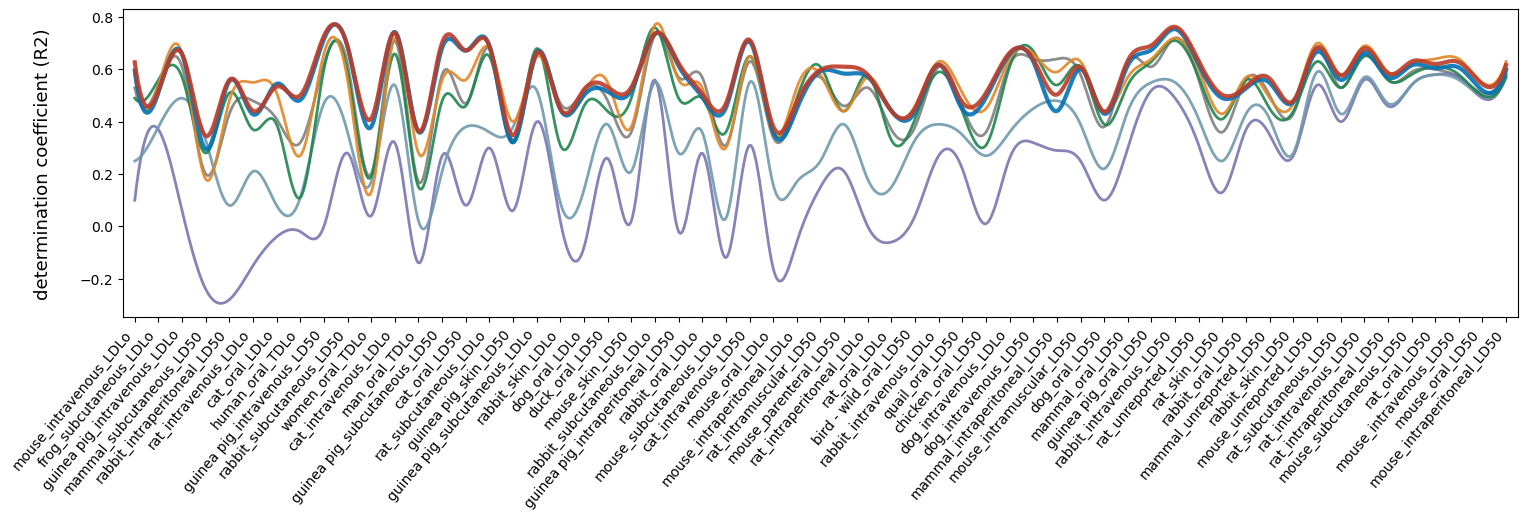

In [34]:
# smooth  R2
x = np.array(range(0,59))
f_MT_DNN_R2 = interp1d(x, MT_DNN_R2, kind='cubic')
f_ST_DNN_R2 = interp1d(x, ST_DNN_R2, kind='cubic')
f_ST_RF_R2 = interp1d(x, ST_RF_R2, kind='cubic')
f_GCNN_R2 = interp1d(x, GCNN_R2, kind='cubic')
f_DLCA_R2 = interp1d(x, DLCA_R2, kind='cubic')
f_MT_NYAN_R2_single = interp1d(x, MT_NYAN_R2_single, kind='cubic')
f_MT_NYAN_R2_5_latents = interp1d(x, MT_NYAN_R2_5_latents, kind='cubic')

x = np.linspace(0, 58, 800)  # sampling rate
new_MT_DNN_R2 = f_MT_DNN_R2(x)
new_ST_DNN_R2 = f_ST_DNN_R2(x)
new_ST_RF_R2 = f_ST_RF_R2(x)
new_GCNN_R2 = f_GCNN_R2(x)
new_DLCA_R2 = f_DLCA_R2(x)
new_MT_NYAN_R2_single = f_MT_NYAN_R2_single(x)
new_MT_NYAN_R2_5_latents = f_MT_NYAN_R2_5_latents(x)

fig, ax1 = plt.subplots(figsize=(18,4))
ax1.plot(x, new_MT_DNN_R2, '-', c='gray', label='MT-DNN', linewidth=2, alpha=0.9)
ax1.plot(x, new_ST_DNN_R2, '-',c='#7876B1CC', label='ST-DNN',linewidth=2, alpha=0.9)
ax1.plot(x, new_ST_RF_R2, '-',c='#6F99ADCC', label='ST-RF',linewidth=2, alpha=0.9)
ax1.plot(x, new_GCNN_R2, '-',c='#20854ECC', label='GCNN',linewidth=2,alpha=0.9)
ax1.plot(x, new_DLCA_R2, '-', c='#E18727CC', label='DLCA',linewidth=2,alpha=0.9)
ax1.plot(x, new_MT_NYAN_R2_single, '-',c='#0072B5CC',label='MT-NYAN (single latent)', linewidth=3,alpha=0.9)
ax1.plot(x, new_MT_NYAN_R2_5_latents, '-', c='#BC3C29CC', label='MT-NYAN (5 random latents)',linewidth=3,alpha=0.9)

# ax1.legend()
ax1.set_ylabel('determination coefficient (R2)',fontsize=13,labelpad=20)
ax1.set_xlim(-0.5,58.5)
ax1.set_xticks(range(0,59,1))
ax1.set_xticklabels(endpoints,rotation=50, ha='right',va='top')

# plt.grid() 
# plt.legend(fontsize=9.5)
fig.savefig('figures/MTL_59endpoint(R2).pdf', bbox_inches='tight', pad_inches=0.1)

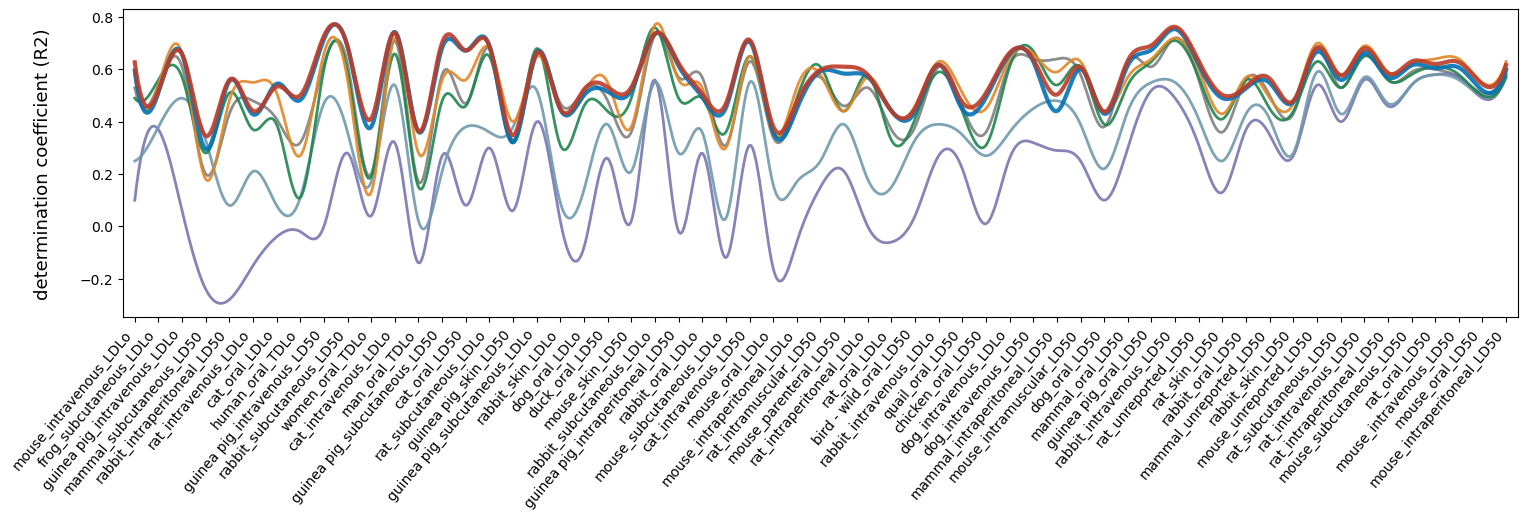

In [35]:
# smooth  R2
x = np.array(range(0,59))
f_MT_DNN_R2 = interp1d(x, MT_DNN_R2, kind='cubic')
f_ST_DNN_R2 = interp1d(x, ST_DNN_R2, kind='cubic')
f_ST_RF_R2 = interp1d(x, ST_RF_R2, kind='cubic')
f_GCNN_R2 = interp1d(x, GCNN_R2, kind='cubic')
f_DLCA_R2 = interp1d(x, DLCA_R2, kind='cubic')
f_MT_NYAN_R2_single = interp1d(x, MT_NYAN_R2_single, kind='cubic')
f_MT_NYAN_R2_5_latents = interp1d(x, MT_NYAN_R2_5_latents, kind='cubic')

x = np.linspace(0, 58, 800)  # sampling rate
new_MT_DNN_R2 = f_MT_DNN_R2(x)
new_ST_DNN_R2 = f_ST_DNN_R2(x)
new_ST_RF_R2 = f_ST_RF_R2(x)
new_GCNN_R2 = f_GCNN_R2(x)
new_DLCA_R2 = f_DLCA_R2(x)
new_MT_NYAN_R2_single = f_MT_NYAN_R2_single(x)
new_MT_NYAN_R2_5_latents = f_MT_NYAN_R2_5_latents(x)

fig, ax1 = plt.subplots(figsize=(18,4))
ax1.plot(x, new_MT_DNN_R2, '-', c='gray', label='MT-DNN', linewidth=2, alpha=0.9)
ax1.plot(x, new_ST_DNN_R2, '-',c='#7876B1CC', label='ST-DNN',linewidth=2, alpha=0.9)
ax1.plot(x, new_ST_RF_R2, '-',c='#6F99ADCC', label='ST-RF',linewidth=2, alpha=0.9)
ax1.plot(x, new_GCNN_R2, '-',c='#20854ECC', label='GCNN',linewidth=2,alpha=0.9)
ax1.plot(x, new_DLCA_R2, '-', c='#E18727CC', label='DLCA',linewidth=2,alpha=0.9)
ax1.plot(x, new_MT_NYAN_R2_single, '-',c='#0072B5CC',label='MT-NYAN (single latent)', linewidth=3,alpha=0.9)
ax1.plot(x, new_MT_NYAN_R2_5_latents, '-', c='#BC3C29CC', label='MT-NYAN (5 random latents)',linewidth=3,alpha=0.9)

# ax1.legend()
ax1.set_ylabel('determination coefficient (R2)',fontsize=13,labelpad=20)
ax1.set_xlim(-0.5,58.5)
ax1.set_xticks(range(0,59,1))
ax1.set_xticklabels(endpoints,rotation=50, ha='right',va='top')

# plt.grid() 
# plt.legend(fontsize=9.5)
fig.savefig('figures/MTL_59endpoint(R2).pdf', bbox_inches='tight', pad_inches=0.1)

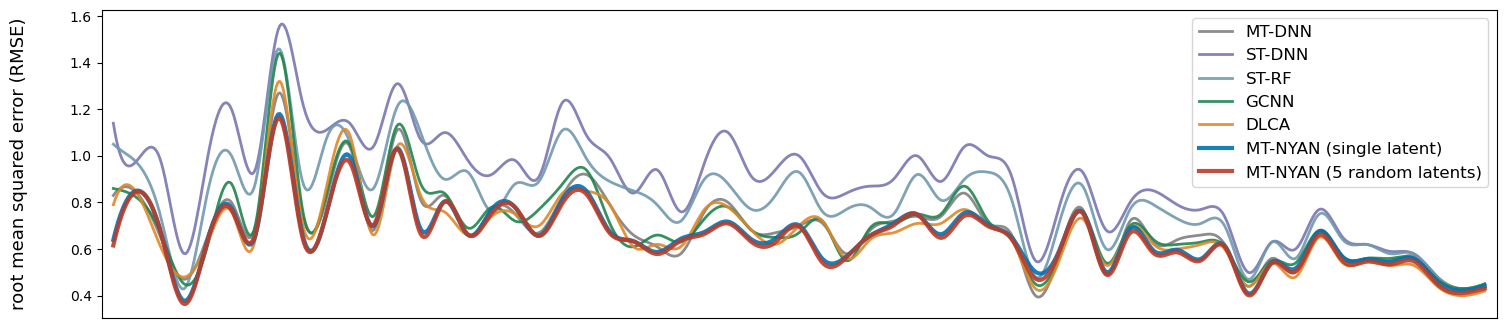

In [36]:
# smooth  RMSE
x = np.array(range(0,59))
f_MT_DNN_RMSE = interp1d(x, MT_DNN_RMSE, kind='cubic')
f_ST_DNN_RMSE = interp1d(x, ST_DNN_RMSE, kind='cubic')
f_ST_RF_RMSE = interp1d(x, ST_RF_RMSE, kind='cubic')
f_GCNN_RMSE = interp1d(x, GCNN_RMSE, kind='cubic')
f_DLCA_RMSE = interp1d(x, DLCA_RMSE, kind='cubic')
f_MT_NYAN_RMSE_single = interp1d(x, MT_NYAN_RMSE_single, kind='cubic')
f_MT_NYAN_RMSE_5_latents = interp1d(x, MT_NYAN_RMSE_5_latents, kind='cubic')

x = np.linspace(0, 58, 800)  # sampling rate
new_MT_DNN_RMSE = f_MT_DNN_RMSE(x)
new_ST_DNN_RMSE = f_ST_DNN_RMSE(x)
new_ST_RF_RMSE = f_ST_RF_RMSE(x)
new_GCNN_RMSE = f_GCNN_RMSE(x)
new_DLCA_RMSE = f_DLCA_RMSE(x)
new_MT_NYAN_RMSE_single = f_MT_NYAN_RMSE_single(x)
new_MT_NYAN_RMSE_5_latents = f_MT_NYAN_RMSE_5_latents(x)

fig, ax1 = plt.subplots(figsize=(18,4))
ax1.plot(x, new_MT_DNN_RMSE, '-', c='gray', label='MT-DNN', linewidth=2,alpha=0.9)
ax1.plot(x, new_ST_DNN_RMSE, '-',c='#7876B1CC', label='ST-DNN',linewidth=2,alpha=0.9)
ax1.plot(x, new_ST_RF_RMSE, '-',c='#6F99ADCC', label='ST-RF',linewidth=2,alpha=0.9)
ax1.plot(x, new_GCNN_RMSE, '-',c='#20854ECC', label='GCNN',linewidth=2,alpha=0.9)
ax1.plot(x, new_DLCA_RMSE, '-', c='#E18727CC', label='DLCA',linewidth=2,alpha=0.9)
ax1.plot(x, new_MT_NYAN_RMSE_single, '-',c='#0072B5CC',label='MT-NYAN (single latent)', linewidth=3,alpha=0.9)
ax1.plot(x, new_MT_NYAN_RMSE_5_latents, '-', c='#BC3C29CC', label='MT-NYAN (5 random latents)',linewidth=3,alpha=0.9)

ax1.legend()
ax1.set_ylabel('root mean squared error (RMSE)',fontsize=13,labelpad=30)
ax1.set_xlim(-0.5,58.5)
ax1.set_xticks([])
# ax1.set_xticklabels(endpoints,rotation=50, ha='right',va='top')

# plt.grid() 
plt.legend(fontsize=12)
fig.savefig('figures/MTL_59endpoint(RMSE).pdf', bbox_inches='tight', pad_inches=0.1)

In [37]:
RMSE = [[0.90, 0.96, 0.84, 0.87, 0.87],
        [0.84, 0.86, 0.76, 0.79, 0.79],
        [0.72, 0.72, 0.66, 0.67, 0.68],
        [0.73, 0.74, 0.67, 0.67, 0.70],
        [0.70, 0.71, 0.64, 0.66, 0.66],
        [0.65, 0.66, 0.63, 0.68, 0.68],
        [0.64, 0.65, 0.62, 0.68, 0.67],]

R2   = [[0.25, 0.13, 0.23, 0.21, 0.19],
        [0.34, 0.31, 0.38, 0.36, 0.34],
        [0.51, 0.50, 0.52, 0.52, 0.51],
        [0.50, 0.48, 0.50, 0.53, 0.49],
        [0.54, 0.51, 0.55, 0.55, 0.54],
        [0.56, 0.55, 0.57, 0.54, 0.56],
        [0.58, 0.56, 0.59, 0.55, 0.57],]
methods = ['ST-DNN', 'ST-RF','MT-DNN', 'GCNN', 'DCLA', 'MT-NYAN (single latent)','MT-NYAN (5 random latents)']

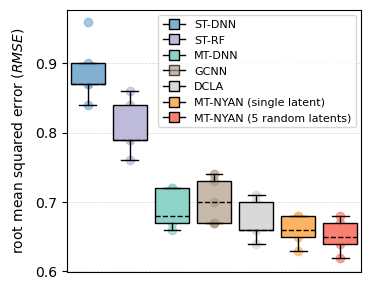

In [38]:
figure, ax = plt.subplots(figsize=(3.8,3.4))
bp = ax.boxplot(RMSE, vert=True, showfliers=False, widths=0.8, patch_artist=True)

for box, color in zip(bp['boxes'], colorlist): 
    box.set_facecolor(color=color)
    
for i in range(len(RMSE)):
    plt.scatter(np.linspace(i+1, i+1, 5), RMSE[i], color=colorlist[i], alpha=.7 )

for median in bp['medians']:
    median.set(color='black',linestyle='--', linewidth=1)

for whisker, cap in zip(bp['whiskers'], bp['caps']):
    whisker.set(color='black', linestyle='-', linewidth=1)
    cap.set(color='black', linewidth=1)

for flier in bp['fliers']:
    flier.set(marker='.', markeredgecolor='black', markerfacecolor='none', markersize=8, linewidth=2)
    
ax.set_ylabel('root mean squared error ($RMSE$)',fontsize=10, labelpad=5)
ax.set_yticks([0.6,0.7,0.8,0.9])
ax.set_yticklabels([0.6,0.7,0.8,0.9], fontsize=10)
ax.set_xticks([])

legend_patches = [plt.Line2D([0], [0], marker='s', color='k', markerfacecolor=color, markersize=7, linewidth=1) for color in colorlist]
labels = methods
plt.legend(legend_patches, labels, fontsize=8)
plt.grid(axis='y', linestyle='--',linewidth=0.5, alpha=0.5)

figure.savefig('figures/MTL_box_RMSE.pdf', bbox_inches='tight', pad_inches=0.1)
plt.show()

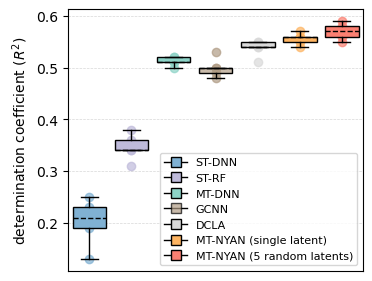

In [39]:
figure, ax = plt.subplots(figsize=(3.8,3.4))
bp = ax.boxplot(R2,vert=True, showfliers=False, widths=0.8,patch_artist=True)

for box, color in zip(bp['boxes'], colorlist): 
    box.set_facecolor(color=color)
    
for i in range(len(R2)):
    plt.scatter(np.linspace(i+1, i+1, 5), R2[i], color=colorlist[i], alpha=.7 )

for median in bp['medians']:
    median.set(color='black',linestyle='--', linewidth=1)

for whisker, cap in zip(bp['whiskers'], bp['caps']):
    whisker.set(color='black', linestyle='-', linewidth=1)
    cap.set(color='black', linewidth=1)

for flier in bp['fliers']:
    flier.set(marker='.', markeredgecolor='black', markerfacecolor='none', markersize=7, linewidth=2)
ax.set_ylabel('determination coefficient ($R^2$)',fontsize=10, labelpad=5)
ax.set_xticks([])
legend_patches = [plt.Line2D([0], [0], marker='s', color='k', markerfacecolor=color, markersize=7, linewidth=1) for color in colorlist]
labels = methods
plt.legend(legend_patches, labels, fontsize=8)
plt.grid(axis='y', linestyle='--',linewidth=0.5, alpha=0.5)

figure.savefig('figures/MTL_box_R2.pdf', bbox_inches='tight', pad_inches=0.1)
plt.show()

In [40]:
methods = ['ST-DNN-RMSE', 'ST-DNN-R2',
           'ST-RF-RMSE', 'ST-RF-R2', 
           'MT-DNN-RMSE', 'MT-DNN-R2', 
           'GCNN-RMSE', 'GCNN-R2', 
           'DLCA-RMSE','DLCA-R2', 
           'MT-NYAN-RMSE (single latent)', 'MT-NYAN-R2 (single latent)',
           'MT-NYAN-RMSE (5 random latents)', 'MT-NYAN-R2 (5 random latents)']

In [41]:
# RMSE ranking
RMSE_mat = df[methods[0::2]].values
RMSE_rank_mat = np.zeros_like(RMSE_mat,dtype=int)

for dataset_id in range(len(RMSE_mat)):
    sort_index = RMSE_mat[dataset_id].argsort()
    for rank, index in enumerate(sort_index):
        RMSE_rank_mat[dataset_id][index] = rank+1


# R2 ranking
R2_mat = df[methods[1::2]].values
R2_rank_mat = np.zeros_like(R2_mat,dtype=int)

for dataset_id in range(len(R2_mat)):
    sort_index = R2_mat[dataset_id].argsort()[::-1]
    for rank, index in enumerate(sort_index):
        R2_rank_mat[dataset_id][index] = rank+1

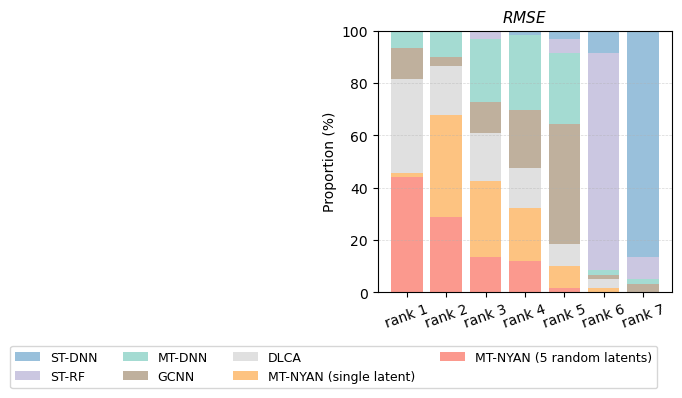

In [42]:
perc_mat = []
for rank_id in range(1,8):
    perc = []
    for i in range(7):  # each model
        count = np.sum(RMSE_rank_mat[:,i]==rank_id)
        perc.append(count/59)
    perc_mat.append(perc)
    
perc_mat = np.array(perc_mat)


width=0.8
x = np.array(range(1,8))
figure, ax = plt.subplots(figsize=(3.8,3.4))
ax.bar(x, perc_mat[:,6], width=width, color=colorlist[6], align='center', 
       label="MT-NYAN (5 random latents)", alpha=0.8)
ax.bar(x, perc_mat[:,5], width=width, color=colorlist[5], bottom = perc_mat[:,6], align='center', 
       label="MT-NYAN (single latent)", alpha=0.8)
ax.bar(x, perc_mat[:,4], width=width, color=colorlist[4], bottom = perc_mat[:,5:].sum(1), align='center', 
       label="DLCA", alpha=0.8)
ax.bar(x, perc_mat[:,3], width=width, color=colorlist[3], bottom = perc_mat[:,4:].sum(1), align='center', 
       label="GCNN", alpha=0.8)
ax.bar(x, perc_mat[:,2], width=width, color=colorlist[2], bottom = perc_mat[:,3:].sum(1), align='center', 
       label="MT-DNN", alpha=0.8)
ax.bar(x, perc_mat[:,1], width=width, color=colorlist[1], bottom = perc_mat[:,2:].sum(1), align='center', 
       label="ST-RF", alpha=0.8)
ax.bar(x, perc_mat[:,0], width=width, color=colorlist[0], bottom = perc_mat[:,1:].sum(1), align='center', 
       label="ST-DNN", alpha=0.8)
ax.set_ylabel('Proportion (%)',fontsize=10, labelpad=3)
ax.set_xticks([])

ax.set_xticks(range(1,8,1))
ax.set_xticklabels(['rank {}'.format(i) for i in range(1,8)],rotation=20, fontsize=10)
ax.set_yticks([0,0.2,0.4,0.6,0.8,1])
ax.set_yticklabels([0, 20, 40, 60, 80,100],rotation=0, fontsize=10)

plt.grid(axis='y', linestyle='--',linewidth=0.5, alpha=0.5)

handles, labels = ax.get_legend_handles_labels()
ax.set_title('$RMSE$', fontsize=11)
ax.legend(handles[::-1], labels[::-1],
         loc='upper center', bbox_to_anchor=(-0.15, -0.18), ncol=4, fontsize=9)


figure.savefig('figures/MTL_Propotion_RMSE.pdf', bbox_inches='tight', pad_inches=0.1)
plt.show()

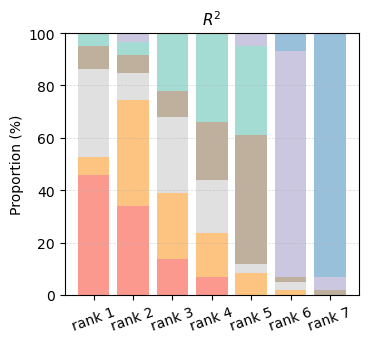

In [43]:
perc_mat = []
for rank_id in range(1,8):
    perc = []
    for i in range(7):  # each model
        count = np.sum(R2_rank_mat[:,i]==rank_id)
        perc.append(count/59)
    perc_mat.append(perc)
    
perc_mat = np.array(perc_mat)


width=0.8
x = np.array(range(1,8))
figure, ax = plt.subplots(figsize=(3.8,3.4))
ax.bar(x, perc_mat[:,6], width=width, color=colorlist[6], align='center', 
       label="MT-NYAN (5 random latents)", alpha=0.8)
ax.bar(x, perc_mat[:,5], width=width, color=colorlist[5], bottom = perc_mat[:,6], align='center', 
       label="MT-NYAN (single latent)", alpha=0.8)
ax.bar(x, perc_mat[:,4], width=width, color=colorlist[4], bottom = perc_mat[:,5:].sum(1), align='center', 
       label="DLCA", alpha=0.8)
ax.bar(x, perc_mat[:,3], width=width, color=colorlist[3], bottom = perc_mat[:,4:].sum(1), align='center', 
       label="GCNN", alpha=0.8)
ax.bar(x, perc_mat[:,2], width=width, color=colorlist[2], bottom = perc_mat[:,3:].sum(1), align='center', 
       label="MT-DNN", alpha=0.8)
ax.bar(x, perc_mat[:,1], width=width, color=colorlist[1], bottom = perc_mat[:,2:].sum(1), align='center', 
       label="ST-RF", alpha=0.8)
ax.bar(x, perc_mat[:,0], width=width, color=colorlist[0], bottom = perc_mat[:,1:].sum(1), align='center', 
       label="ST-DNN", alpha=0.8)
ax.set_ylabel('Proportion (%)',fontsize=10, labelpad=3)
ax.set_xticks([])
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.12), ncol=1, fontsize=6)
ax.set_xticks(range(1,8,1))
ax.set_xticklabels(['rank {}'.format(i) for i in range(1,8)],rotation=20, fontsize=10)
ax.set_yticks([0,0.2,0.4,0.6,0.8,1])
ax.set_yticklabels([0, 20, 40, 60, 80,100],rotation=0, fontsize=10)
ax.set_title('$R^2$', fontsize=11)

plt.grid(axis='y', linestyle='--',linewidth=0.5, alpha=0.5)
figure.savefig('figures/MTL_Propotion_R2.pdf', bbox_inches='tight', pad_inches=0.1)
plt.show()

In [44]:
# single latent vs 5 random latents 

def convert_pvalue_to_asterisks(pvalue):
    if pvalue <= 0.0001:
        return "****"
    elif pvalue <= 0.001:
        return "***"
    elif pvalue <= 0.01:
        return "**"
    elif pvalue <= 0.05:
        return "*"
    return "ns"

/var/folders/fc/31nlp6zj68d9fkxg15b3wblh0000gn/T/ipykernel_2941/4070812529.py:7: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.swarmplot(data=df[[methods[-3],methods[-1]]], palette=['w'],  alpha=0.4)
/Users/jianglu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jianglu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


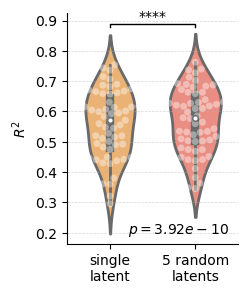

In [51]:
# R2
figure, ax = plt.subplots(figsize=(2.2, 3))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


sns.swarmplot(data=df[[methods[-3],methods[-1]]], palette=['w'],  alpha=0.4)
sns.violinplot(data=df[[methods[-3],methods[-1]]], palette=colorlist[5:],linewidth=2,width=0.6, alpha=0.5)

# -------- pvalue mark ------------
_, pvalue = scipy.stats.wilcoxon(MT_NYAN_R2_single, MT_NYAN_R2_5_latents)
p_value_cov = convert_pvalue_to_asterisks(pvalue)
x1, x2 = 0, 1
y, h = 0.88, 0.01
ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c= 'k')
ax.text((x1+x2)/2, y+h, p_value_cov, ha='center', va='bottom', color='k')
ax.text(0.8, 0.18, '$p=3.92e-10$', ha='center', va='bottom', color='k')


ax.set_xlim(-0.5,1.5)
ax.set_xticks(range(0,2))
ax.set_xticklabels(['single\nlatent', '5 random\nlatents'],rotation=0, fontsize=10)
ax.set_ylabel('$R^2$',fontsize=10, labelpad=5)


plt.grid(axis='y', linestyle='--',linewidth=0.5, alpha=0.5)
figure.savefig('figures/violin_R2.pdf', bbox_inches='tight', pad_inches=0.1)
plt.show()

/var/folders/fc/31nlp6zj68d9fkxg15b3wblh0000gn/T/ipykernel_2941/3360881854.py:7: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.swarmplot(data=df[[methods[-4],methods[-2]]], palette=['w'],  alpha=0.4)
/Users/jianglu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jianglu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jianglu/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 10.2% of the points cannot be placed; you may want to decrease 

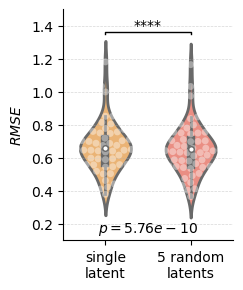

In [46]:
# R2
figure, ax = plt.subplots(figsize=(2.2, 3))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


sns.swarmplot(data=df[[methods[-4],methods[-2]]], palette=['w'],  alpha=0.4)
sns.violinplot(data=df[[methods[-4],methods[-2]]], palette=colorlist[5:],linewidth=2,width=0.6, alpha=0.5)

# -------- pvalue mark ------------
_, pvalue = scipy.stats.wilcoxon(MT_NYAN_RMSE_single, MT_NYAN_RMSE_5_latents)
p_value_cov = convert_pvalue_to_asterisks(pvalue)
x1, x2 = 0, 1
y, h = 1.35, 0.01
ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c= 'k')
ax.text((x1+x2)/2, y+h, p_value_cov, ha='center', va='bottom', color='k')
ax.text(0.5, 0.12, '$p=5.76e-10$', ha='center', va='bottom', color='k')


ax.set_xlim(-0.5,1.5)
ax.set_ylim(0.1,1.5)
ax.set_xticks(range(0,2))
ax.set_xticklabels(['single\nlatent', '5 random\nlatents'],rotation=0, fontsize=10)
ax.set_ylabel('$RMSE$',fontsize=10, labelpad=5)


plt.grid(axis='y', linestyle='--',linewidth=0.5, alpha=0.5)
figure.savefig('figures/violin_RMSE.pdf', bbox_inches='tight', pad_inches=0.1)
plt.show()

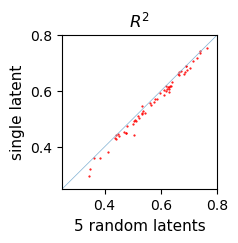

In [47]:
figure, ax = plt.subplots(figsize=(2., 2.))
ax.scatter(df[[methods[-1]]],df[[methods[-3]]],s=0.3, c='r'  )
ax.plot([0.25,0.8],[0.25,0.8],'-', c=colorlist[0], linewidth=0.5)
ax.set_xlim(0.25,0.8)
ax.set_ylim(0.25,0.8)
ax.set_ylabel('single latent', fontsize=11)
ax.set_xlabel('5 random latents', fontsize=11)
ax.set_title('$R^2$', fontsize=12)
figure.savefig('./figures/pair_relation_R2.pdf', bbox_inches='tight', pad_inches=0.1)
plt.show()

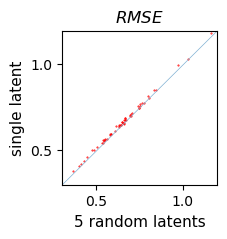

In [48]:
figure, ax = plt.subplots(figsize=(2., 2.))
ax.scatter(df[[methods[-2]]],df[[methods[-4]]],s=0.2, c='r'  )
ax.plot([0.305,1.2],[0.3, 1.195],'-', c=colorlist[0], linewidth=0.5)
ax.set_xlim(0.305,1.2)
ax.set_ylim(0.3,1.195)
ax.set_yticks([0.5,1.0])
ax.set_ylabel('single latent', fontsize=11)
ax.set_xlabel('5 random latents', fontsize=11)
ax.set_title('$RMSE$', fontsize=12)
figure.savefig('./figures/pair_relation_RMSE.pdf', bbox_inches='tight', pad_inches=0.1)
plt.show()